# Sentiment Analysis
### Comparison between OpenAI and Vader Sentiment Classification models 





<a id="sec1"></a>

## 1. F-score <b>

In [1]:
import pandas as pd
from sklearn.metrics import f1_score


df = pd.read_csv('all_sentiment.csv') #file with both Vader and OpenAI Sentiment Scores

In [2]:
initial_row_count = len(df)
df = df.dropna(subset=['Manually'])
rows_dropped = initial_row_count - len(df)
print("Number of rows dropped:", rows_dropped)

Number of rows dropped: 5


In [3]:
def compare_sentiments(df):
    df['gpt_correct'] = 0
    df['vader_correct'] = 0

    for index, row in df.iterrows():
        if row['Sentiment_GPT'] == row['Manually']:
            df.at[index, 'gpt_correct'] = 1
        if row['Sentiment_Vader'] == row['Manually']:
            df.at[index, 'vader_correct'] = 1

    return df

result_df = compare_sentiments(df)
result_df.head()
#df.to_csv('TESTING.csv', index=False)  

,File Name,Content,Sentiment_GPT,Sentiment_Vader,Manually,gpt_correct,vader_correct
0,@401.leo_video_7358973934638763307.txt,"I got you. I got you. Jock your da-tchin' on,...",negative,negative,neutral,0,0
1,@99_warstories_video_7336952062644620586.txt,Thanks for watching!,positive,positive,negative,0,0
2,@a.i.newz_video_7215890031607549226.txt,The papal bull Eternity reguses a formal docu...,neutral,negative,neutral,1,0
3,@abcnews_video_7089162430370123051.txt,"Marjorie Taylor Greene, like every member of ...",negative,positive,negative,1,0
4,@abcnews_video_7303688413172075819.txt,We just learned that the Supreme Court has re...,negative,negative,negative,1,1


In [4]:
gpt = df["gpt_correct"]
vader = df["vader_correct"]
df["binary_truth"] = 1
truth = df["binary_truth"]
score_Vader = f1_score(vader, truth, average='binary')  
print("F1 Vader Score:", score_Vader)
score_GPT = f1_score(gpt, truth, average='binary')  
print("F1 GPT Score:", score_GPT)

F1 Vader Score: 0.515625
F1 GPT Score: 0.7898089171974523


C:\Users\ashle\AppData\Local\Temp\ipykernel_12660\1890195655.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, x='Category', y='Counts', palette=['green', 'magenta'])


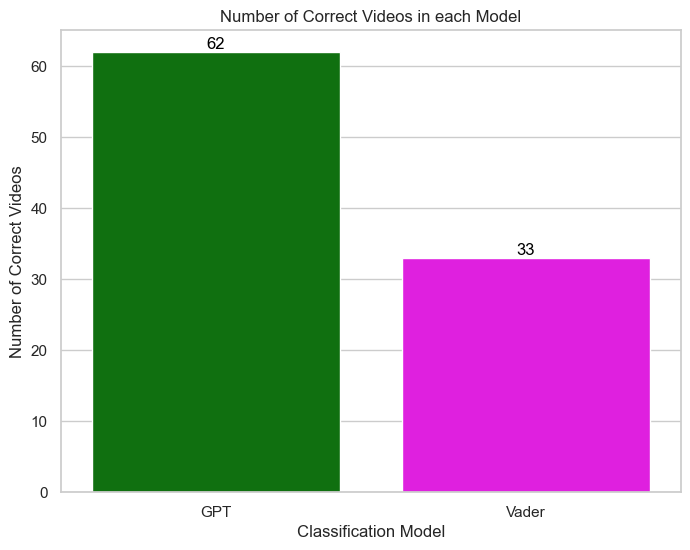

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming result_df is your DataFrame and is already loaded with additional columns

# Calculating counts of 1s for each specific column
counts_gpt = (result_df['gpt_correct'] == 1).sum()
counts_vader = (result_df['vader_correct'] == 1).sum()

# Creating a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['GPT', 'Vader'],
    'Counts': [counts_gpt, counts_vader]
})

sns.set_theme(style="whitegrid")

# Plotting the data
plt.figure(figsize=(8, 6))  
ax = sns.barplot(data=plot_data, x='Category', y='Counts', palette=['green', 'magenta'])
plt.title('Number of Correct Videos in each Model')
plt.ylabel('Number of Correct Videos')
plt.xlabel('Classification Model')

# Adding the text on the bars
for index, value in enumerate(plot_data['Counts']):
    ax.text(index, value, str(value), color='black', ha="center", va='bottom')

plt.show()



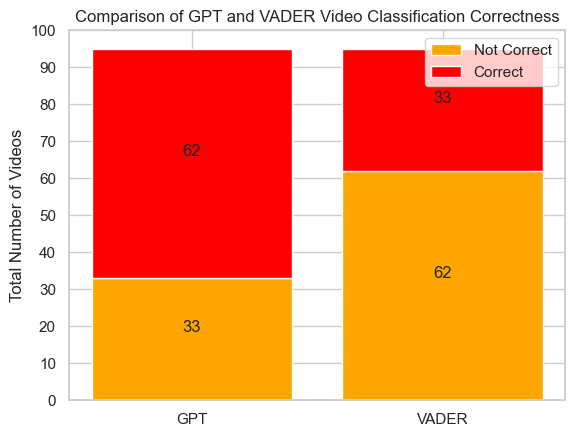

In [69]:
counts_gpt = (result_df['gpt_correct'] == 1).sum()
counts_vader = (result_df['vader_correct'] == 1).sum()

counts_totalGPT = len(result_df)-counts_gpt
counts_totalVader = len(result_df)-counts_vader

df = pd.DataFrame({
    'counts_gpt': [counts_gpt],
    'counts_vader': [counts_vader],
    'counts_totalGPT': [counts_totalGPT],
    'counts_totalVader': [counts_totalVader]
})

fig, ax = plt.subplots()

bar2 = ax.bar('GPT', df['counts_totalGPT'], color='orange')
bar1 = ax.bar('GPT', df['counts_gpt'], bottom=df['counts_totalGPT'],color='red')

bar4 = ax.bar('VADER', df['counts_totalVader'], label='Not Correct', color='orange')
bar3= ax.bar('VADER', df['counts_vader'],bottom= df['counts_totalVader'], label='Correct', color='red')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

ax.set_ylabel('Total Number of Videos')
ax.set_title('Comparison of GPT and VADER Video Classification Correctness')
ax.legend()

plt.show()
